# EDA Assignment (Bike Details) - Colab Notebook
Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'/BIKE DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


## Question 1: Shape and columns

In [10]:
df.shape, list(df.columns)

((1061, 7),
 ['name',
  'selling_price',
  'year',
  'seller_type',
  'owner',
  'km_driven',
  'ex_showroom_price'])

##  Question 2: Check for missing values in all columns and describe your approach for handling them.


In [11]:
# Create cleaned copy (median for numeric, mode for categorical)
df_clean = df.copy()
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
for c in num_cols:
    if df_clean[c].isnull().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())
for c in cat_cols:
    if df_clean[c].isnull().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0] if not df_clean[c].mode().empty else "")

print("\nMissing values after handling:")
print(df_clean.isnull().sum())


Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


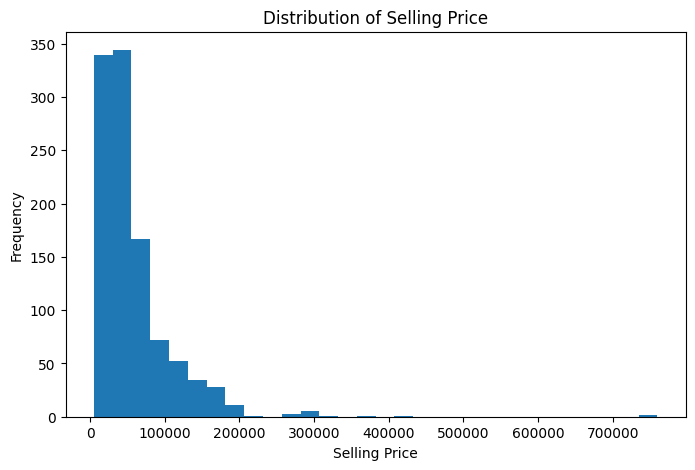

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['selling_price'].dropna(), bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.


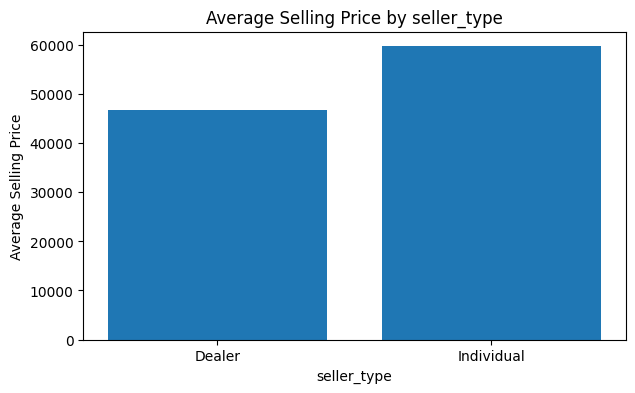

In [13]:
avg_by_seller = df_clean.groupby('seller_type')['selling_price'].mean().reset_index()
avg_by_seller

plt.figure(figsize=(7,4))
plt.bar(avg_by_seller['seller_type'], avg_by_seller['selling_price'])
plt.title('Average Selling Price by seller_type')
plt.xlabel('seller_type')
plt.ylabel('Average Selling Price')
plt.show()

## Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.



,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


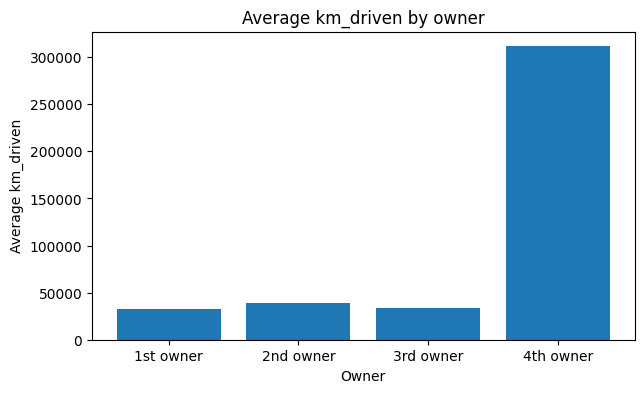

In [14]:
if 'owner' in df_clean.columns:
    avg_km_by_owner = df_clean.groupby('owner')['km_driven'].mean().reset_index()
    display(avg_km_by_owner)
    plt.figure(figsize=(7,4))
    plt.bar(avg_km_by_owner['owner'].astype(str), avg_km_by_owner['km_driven'])
    plt.title('Average km_driven by owner')
    plt.xlabel('Owner')
    plt.ylabel('Average km_driven')
    plt.show()
else:
    print('owner column not found')

## Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [15]:
Q1 = df_clean['km_driven'].quantile(0.25)
Q3 = df_clean['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Bounds:', lower, upper)
print('Before:')
print(df_clean['km_driven'].describe())

df_no_out = df_clean[(df_clean['km_driven'] >= lower) & (df_clean['km_driven'] <= upper)].copy()
print('After:')
print(df_no_out['km_driven'].describe())

Bounds: -30750.0 87250.0
Before:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


## Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


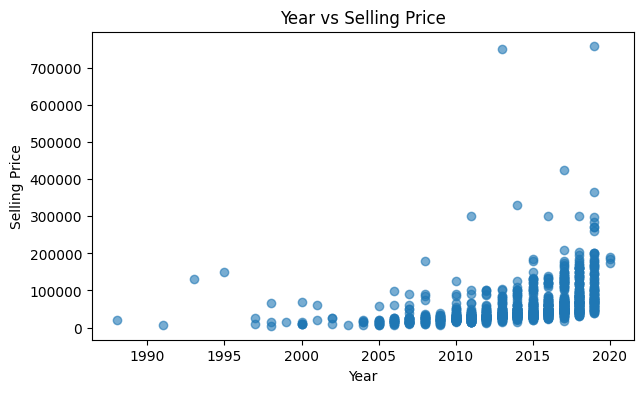

In [16]:
plt.figure(figsize=(7,4))
plt.scatter(df_clean['year'], df_clean['selling_price'], alpha=0.6)
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

## Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [17]:
df_ohe = pd.get_dummies(df_clean, columns=['seller_type'], prefix='seller', drop_first=False)
df_ohe.head(5)

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,False,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,False,True


## Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


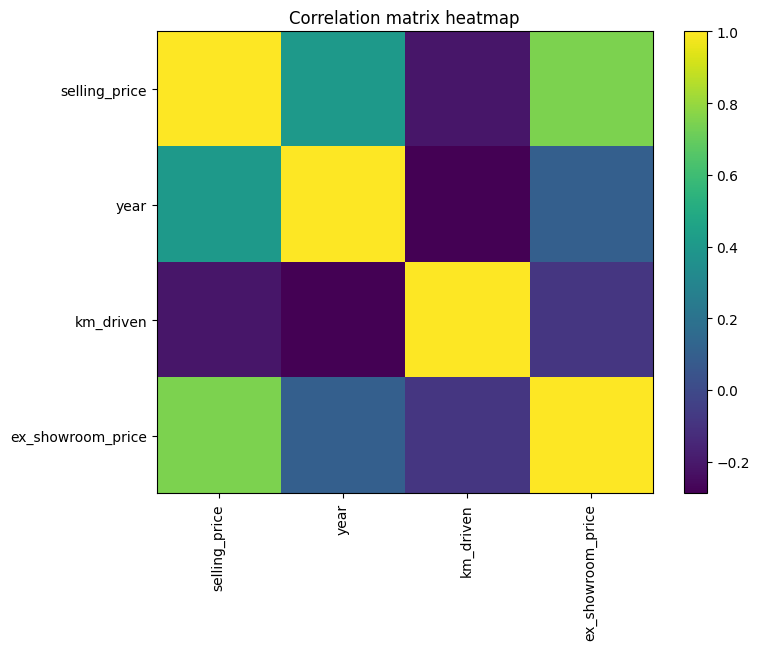

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.744075
year                    0.402188  1.000000  -0.288675           0.100066
km_driven              -0.212937 -0.288675   1.000000          -0.086791
ex_showroom_price       0.744075  0.100066  -0.086791           1.000000


In [18]:
numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation matrix heatmap')
plt.show()
print(corr)

## Question 10: Summarize your findings in a brief report:

In [20]:
print('Summary of findings:')
print('Most important factors affecting selling price typically include year (age), km_driven (usage), and brand/model/variant if present.')
print('\nData cleaning steps performed: filled missing numeric values with median and categorical with mode; removed outliers from km_driven using IQR for one analysis.')

Summary of findings:
Most important factors affecting selling price typically include year (age), km_driven (usage), and brand/model/variant if present.

Data cleaning steps performed: filled missing numeric values with median and categorical with mode; removed outliers from km_driven using IQR for one analysis.
